## **EXPERIMENT 7**







### **AIM:**

Object Recognition Using CNN

### **THEORY AND SOURCE CODE:**

In this practical, the VGG16 model has been trained on pre-trained weights on ImageNet for the task of object detection.To perform localization,bounding box location coordinates are used. A bounding box location is represented by the 4-D vector (center coordinates(x,y), height, width).



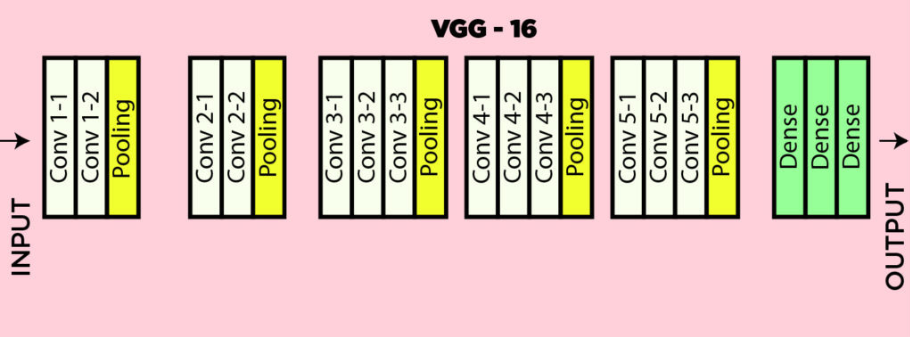

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
base_path="/content/drive/MyDrive/SEM 6 (DEEP L)"
images=os.path.sep.join([base_path,'images'])
annotations=os.path.sep.join([base_path,'airplanes.csv'])

In [3]:
# Loading the Dataset

# Airplanes annotation is a Csv file thats why we can see through with rows
rows= open(annotations).read().strip().split("\n")

# Make three list where we save our exact bounding boxes
data=[]
targets=[]
filenames=[]

In [4]:
# split dataset according to images

# import libraries
import cv2
from tensorflow.keras.preprocessing.image import load_img
# we also save images into array format so, import img_array library too
from tensorflow.keras.preprocessing.image import img_to_array

for row in rows:
  row=row.split(",")
  # we always create rectangle with h + w so we have to know where exactly we should start from
  (filename,startX,startY,endX,endY)=row

  imagepaths=os.path.sep.join([images,filename])
  image=cv2.imread(imagepaths)
  (h,w)=image.shape[:2]

  # initializing starting point

  # Take float values for the ease of conversion into array
  startX = float(startX) / w
  startY = float(startY) / h
  # initialize ending point 
  endX = float(endX) / w
  endY = float(endY) / h

  #load image and give them default size
  image=load_img(imagepaths,target_size=(224,224))
  # see here if we cant take it into float then we face trouble 
  image=img_to_array(image)

  # Lets append into data , targets ,filenames
  targets.append((startX,startY,endX,endY))
  filenames.append(filename)
  data.append(image)

In [5]:
# Normalizing Data 
import numpy as np
data=np.array(data,dtype='float32') / 255.0
targets=np.array(targets,dtype='float32')

In [6]:
# we should seperate data into train and split so import sklearn library 
from sklearn.model_selection import train_test_split

In [7]:
# split into testing and training
split=train_test_split(data,targets,filenames,test_size=0.10,random_state=42)

In [8]:
# lets split into steps
(train_images,test_images) = split[:2]
(train_targets,test_targets) = split[2:4]
(train_filenames,test_filenames) = split[4:]


In [9]:
# lets import pre trained VGG16 : A builtin model for computer vision
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

In [10]:
# so here we just want limited layers so included_top is set as false 

vgg=VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [11]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
from tensorflow.keras.layers import Input,Flatten,Dense

In [13]:
# we use VGG16 as per requirement 
vgg.trainable = False

flatten = vgg.output

flatten = Flatten()(flatten)

In [14]:
# Lets make bboxhead
bboxhead = Dense(128,activation="relu")(flatten)
bboxhead = Dense(64,activation="relu")(bboxhead)
bboxhead = Dense(32,activation="relu")(bboxhead)
bboxhead = Dense(4,activation="relu")(bboxhead)

In [15]:
# lets import Model
from tensorflow.keras.models import Model
model = Model(inputs = vgg.input,outputs = bboxhead)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
# Fit the model 

# Optimization 
from tensorflow.keras.optimizers import Adam

opt = Adam(1e-4)

In [18]:
model.compile(loss='mse',optimizer=opt)

In [28]:
history = model.fit(train_images,train_targets,validation_data=(test_images,test_targets),batch_size=32,epochs=50,verbose=1)

Epoch 1/50
23/23 [==============================] - 20s 257ms/step - loss: 0.0562 - val_loss: 0.0081
Epoch 2/50
23/23 [==============================] - 3s 131ms/step - loss: 0.0053 - val_loss: 0.0036
Epoch 3/50
23/23 [==============================] - 3s 132ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 4/50
23/23 [==============================] - 3s 132ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 5/50
23/23 [==============================] - 3s 136ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 6/50
23/23 [==============================] - 3s 132ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 7/50
23/23 [==============================] - 3s 133ms/step - loss: 9.0913e-04 - val_loss: 0.0024
Epoch 8/50
23/23 [==============================] - 3s 148ms/step - loss: 6.9542e-04 - val_loss: 0.0023
Epoch 9/50
23/23 [==============================] - 3s 137ms/step - loss: 5.9076e-04 - val_loss: 0.0023
Epoch 10/50
23/23 [==============================] - 3s 136ms/step - loss: 4.9186e-04 -

In [33]:
# lets save model 
model.save('/content/drive/MyDrive/SEM 6 (DEEP L)/detect_Planes.h5')

In [19]:
from tensorflow.keras.models import load_model

In [20]:
model=load_model('/content/drive/MyDrive/SEM 6 (DEEP L)/detect_Planes.h5')

In [21]:
imagepath='/content/drive/MyDrive/SEM 6 (DEEP L)/images/image_0700.jpg'

In [22]:
image = load_img(imagepath,
                 target_size=(224,224))
image = img_to_array(image) / 255.0
image = np.expand_dims(image,axis=0)

In [23]:
preds=model.predict(image)[0]
(startX,startY,endX,endY)=preds

1/1 [==============================] - 3s 3s/step


In [24]:
import imutils

In [25]:
image=cv2.imread(imagepaths)
image=imutils.resize(image,width=600)

In [26]:
(h,w)=image.shape[:2]

In [27]:
startX=int(startX * w)
startY=int(startY * h)

endX=int(endX * w)
endY=int(endY * h)

In [28]:
cv2.rectangle(image,(startX,startY),(endX,endY),(0,255,0),3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [29]:
from google.colab.patches import cv2_imshow

-1

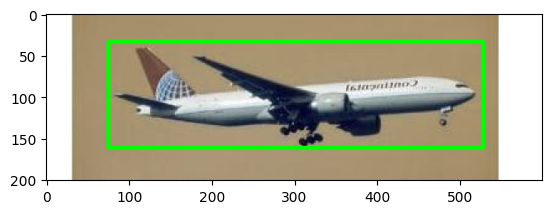

In [30]:
import matplotlib.pyplot as plt
plt.imshow(image)
cv2.waitKey(0)